In [101]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing,svm
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB


import matplotlib.pyplot as plt
from matplotlib import style
import datetime


In [125]:
raw_data='../data/processed/fishtow-ml.csv'
df = pd.read_csv(raw_data)

df = df[df['sex'] == 'F']
#df = df[df['winter'] == 1]

# Create a DataFrame for numerical features
data1 = pd.DataFrame(df, columns=['month','length','sst','bth'])

 
# Create a DataFrame for categorical features
#cols_to_transform = pd.DataFrame(df,columns=['sex'])
#dummies = pd.get_dummies(cols_to_transform)


### SVM Classifier

In [126]:
# Join data1 and dummies using Numpy and yield as array
X = np.array(data1) 
X_scaled = preprocessing.scale(X)

# Specify the dependent variable as array
Y = np.array(df['label-bin'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)

print( X_train.shape, y_train.shape )
print( X_test.shape, y_test.shape )

clf = svm.SVC()
model = clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)

print( "Score: ", model.score(X_test, y_test))


#print("Number of mislabeled points out of a total %d points : %d" % (X_scaled.shape[0],(Y == y_pred).sum()))
# print( [i for i in (Y == y_pred) if i == 0] )

#print( set([i for i in y_pred]) )
# train_pos = [i for i,val in enumerate(Y) if val==0]
# pred_pos = [i for i,val in enumerate(y_pred) if val==0]
# #print( train_pos, pred_pos )
# print( len(train_pos), len(pred_pos) )
train_pos = [i for i,val in enumerate(y_train) if val!=0]
pred_pos = [i for i,val in enumerate(predictions) if val!=0]
print( len(train_pos), len(pred_pos) )

((945, 4), (945,))
((237, 4), (237,))
('Score: ', 0.9746835443037974)
(15, 0)


### Gaussian Naive Bayes Classifier

In [127]:
# Join data1 and dummies using Numpy and yield as array
X = np.array(data1) 
X_scaled = preprocessing.scale(X)
print( X_scaled.mean(), X_scaled.std() )
# Specify the dependent variable as array
Y = np.array(df['label-bin'])


X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)

print( X_train.shape, y_train.shape )
print( X_test.shape, y_test.shape )

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

print( "Score: ", model.score(X_test, y_test))

predictions[90:600]


# y_pred = gnb.fit( X_scaled, Y ).predict( X_scaled )
# print( y_pred.shape )
# print("Number of mislabeled points out of a total %d points : %d" % (X_scaled.shape[0],(Y != y_pred).sum()))
# print( data1[:4] , Y[:4] )

train_pos = [i for i,val in enumerate(y_train) if val!=0]
pred_pos = [i for i,val in enumerate(predictions) if val!=0]
print( len(train_pos), len(pred_pos) )

(2.61024516534121e-16, 0.8660254037844386)
((945, 4), (945,))
((237, 4), (237,))
('Score: ', 0.9873417721518988)
(18, 0)


In [11]:
# First we fit a model
model=lm.fit(X_train,y_train)
#print the coefficents
print("The linear cofficients", model.coef_)
# Try to predict the y ( NPP_Predict) for the test data-features(independent variables(X_test)
predictions=lm.predict(X_test)
# Accuracy of the prediction
confidence = lm.score(X_test, y_test)
print("This is predicted NPP2001 Values ", predictions)
print("This is the prediction accuracy ", confidence)


('The linear cofficients', array([ 0.00756155, -0.02226366,  0.01141143,  0.        , -0.06390983,
        0.06390983]))
('This is predicted NPP2001 Values ', array([ 1.64895635e-01,  2.61367025e-01,  5.83860668e-02,  3.80651446e-01,
        1.51020147e-01,  3.74063578e-01,  4.71138432e-01,  3.70282803e-01,
        1.39985490e-01,  5.29075364e-01,  2.34332245e-01,  2.62869996e-01,
        3.28316312e-01,  3.82351834e-01,  4.11832541e-01,  3.05648770e-01,
        2.96535009e-01,  2.72709351e-01,  4.91068111e-01,  2.26770694e-01,
        2.56290191e-01,  5.08946885e-01,  3.23928394e-01,  4.38336757e-01,
        3.87234671e-01,  5.30873605e-01,  1.86694477e-01,  3.40858636e-01,
        4.19334682e-01,  1.79132926e-01, -9.36305492e-02,  3.21859429e-01,
        2.83347282e-01, -9.38390489e-02,  3.36217036e-01,  1.94256027e-01,
        1.35936396e-01,  6.67012742e-01,  1.11314621e-02,  4.29074820e-01,
        1.15057796e-01,  2.67497476e-01,  4.76430441e-01,  2.37977979e-01,
        3.570502

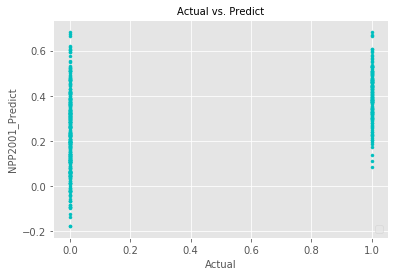

In [12]:

plt.legend(loc=4)
plt.title("Actual vs. Predict", size=10)
plt.scatter(y_test,predictions,color='c', marker='.')
plt.xlabel("Actual", size=10)
plt.ylabel("Predict", size=10)
plt.show()


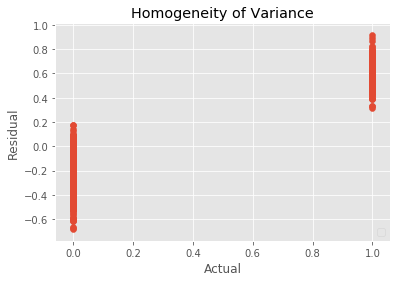

In [13]:
plt.legend(loc=4)
plt.title("Homogeneity of Variance")
plt.scatter(y_test,y_test-predictions)
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.show()
 

In [ ]:
#Perform 10 fold Cross Validation (KFold)
scores=cross_val_score(model,X,y,cv=10)
print ("Cross Validated Scores",scores)
kf=KFold(n_splits=10, random_state=None,shuffle=True)
for train_index, test_index in kf.split(X):
print (“TRAIN”, train_index, “TEST”, test_index)
 X_train,X_test=X[train_index], X[test_index]
 y_train,y_test=y[train_index],y[test_index]
 # Make Cross Validated predictions
 predictions2=cross_val_predict(model,X,y,cv=10)
 #Check the R2- the proportion of variance in the dependent variable explained by the predictors
 accuracy=metrics.r2_score(y,predictions2)
 print (“This is R2”,accuracy)
 plt.scatter(y,predictions2,color=’c’, marker=’.’)
 plt.legend(loc=4)
 plt.xlabel(“Actual NPP2001”, size=10)
 plt.ylabel(“NPP2001_Predict”, size=10)
 plt.title(“Actual and Predicted NPP2001 Values using 10 Fold Cross Validation”,size=10)
 plt.show()

### svm example

('iris shape ', 5)
12
4
6
5
13


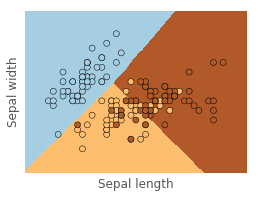

In [23]:
# print(__doc__)

# Code source: Gael Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
#import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
print( "iris shape ", len(iris)  )
for i in iris:
    print( len(i) )

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()